# 抛硬币实验

#### 随着观测抛硬币的数据的增多，绘制了一系列后验概率的更新情况。该后验概率由这个曲线来表征，其不确定程度正比于曲线的宽度。最终，该概率变得紧缩且越来越接近其真实值p=0.5。但注意到，最终图像的峰值不一定在0.5处，这是很正常的。

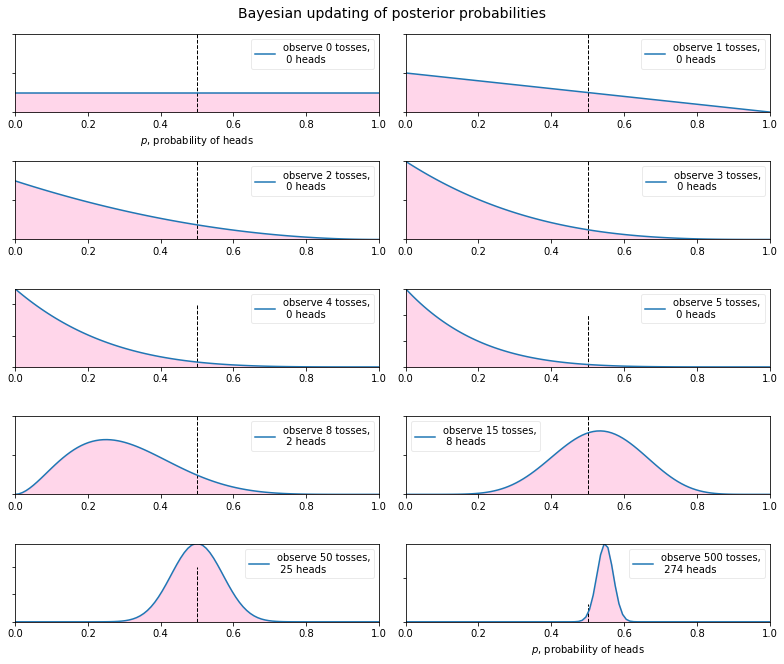

In [1]:
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats


dist = stats.beta
#多次试验
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
#构造500个符合伯努利分布的随机抽样
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)


#使用伯努利分布的共轭先验——Beta分布
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials) / 2, 2, k + 1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials) - 1] else None
    plt.setp(sx.get_yticklabels(), visible=False)#不显示y轴刻度
    heads = data[:N].sum()#统计1的个数
    y = dist.pdf(x, 1 + heads, 1 + N - heads)#构造Beta分布
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#FF99CC", alpha=0.4)#填充色彩到曲线下区域
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)#在0.5处画虚线

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)
    
plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

# 二项分布与Beta分布

### 1. 二项分布

##### scipy.stats.binom为二项分布，下面用它计算抛十次硬币，出现k次正面的概率分布。

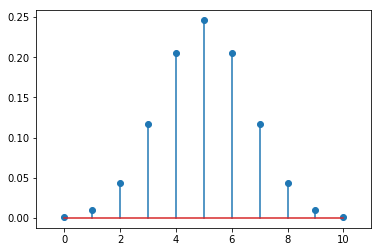

In [2]:
n = 10
k = np.arange(n+1)
pcoin = stats.binom.pmf(k, n, 0.5)#k -> quantiles, n and p -> shape parameters
plt.stem(k, pcoin)#绘制火柴棍图
plt.margins(0.1,0.05)#设置自动缩放的边缘

##### 下面是投掷6次骰子，出现6点的概率分布。

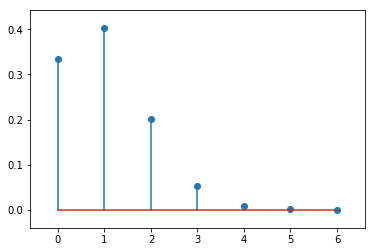

In [3]:
n = 6
k = np.arange(n+1)
pdice = stats.binom.pmf(k, n, 1.0/6)
plt.stem(k, pdice)
plt.margins(0.1)

#### 连续分布用概率密度函数描述，下面绘制实验10次，成功4次和5次时，系统成功概率p的分布情况。可以看出k=5时，曲线的峰值在p=0.5处，而k=4时，曲线的峰值在p=0.4处。当n=30，k=12时，曲线的峰值还在p=0.4处，但是因为随着实验次数的增多，p取其他值的可能就会变小，对p的估计就更有信心，因此山峰就更陡峭了。

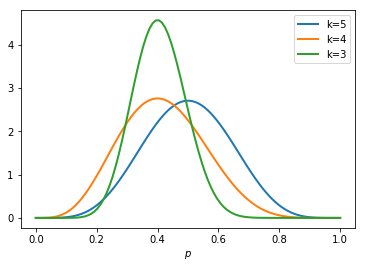

In [4]:
n = 10
k = 5
p = np.linspace(0, 1, 100)
pbeta = stats.beta.pdf(p, k+1, n-k+1)
plt.plot(p, pbeta, label="k=5", lw=2)
k = 4
pbeta = stats.beta.pdf(p, k+1, n-k+1)
plt.plot(p, pbeta, label="k=4", lw=2)
n = 30
k = 12
pbeta = stats.beta.pdf(p, k+1, n-k+1)
plt.plot(p, pbeta, label="k=3", lw=2)

plt.xlabel("$p$")
plt.legend(loc="best")